In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
import dataloader

#os.chdir('C:/1-HYK/UCSD-Course/05-WINTER20-ECE143/GroupProject/Dataset')
#os.chdir('./data')

In [2]:
# This cell merges all years' dataset to make a single combined dataset file.
# But as of today(02/14/2020), I will not used this source code.
# From now on, I will use dataset provided by Chieh Hsu

#extension = 'csv'
#allFileNames = [i for i in glob.glob('*.{}' .format(extension))]

#combined_dataset = pd.concat([pd.read_csv(f) for f in allFileNames])
#combined_dataset.to_csv( "combined_dataset.csv", index=False, encoding='utf-8-sig')

In [3]:
#fireDataFrame = pd.read_csv('C:/1-HYK/UCSD-Course/05-WINTER20-ECE143/GroupProject/Dataset/fd_incidents_2019_datasd_v1.csv')
fireDataFrame = dataloader.load(range(2007,2020))
print(type(fireDataFrame))
#print(fireDataFrame.head)

<class 'pandas.core.frame.DataFrame'>


## Question 1: What is the year-to-year trend of these incidents? Does more incidents occur?

In [27]:
firePivotTable = pd.pivot_table(fireDataFrame, values='incident_number', index=['year_response'], columns=[], aggfunc=numpy.ma.count, fill_value=0)
firePivotTable

,incident_number
year_response,
2007,102797
2008,105596
2009,107729
2010,111946
2011,118143
2012,124188
2013,126430
2014,133197
2015,144381


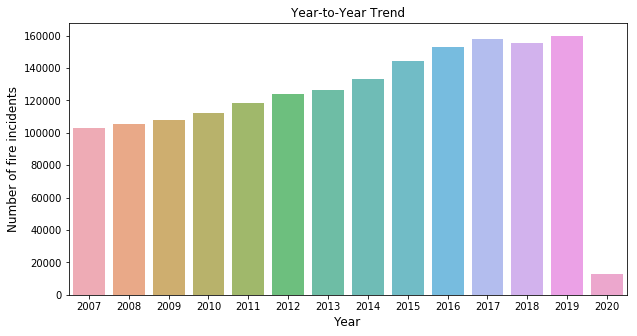

In [28]:
year_count  = fireDataFrame['year_response'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(year_count.index, year_count.values, alpha=0.8)
plt.title('Year-to-Year Trend')
plt.ylabel('Number of fire incidents', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

## Question 2: What month of the year does fire tend to occur? What time of the day does fire tend to occur? Are there any correlations we can explore?

In [29]:
firePivotTable = pd.pivot_table(fireDataFrame, values='incident_number', index=['month_response'], columns=[], aggfunc=numpy.ma.count, fill_value=0)
firePivotTable

,incident_number
month_response,
1,155341
2,130242
3,143848
4,136637
5,140617
6,139216
7,147728
8,147757
9,144236


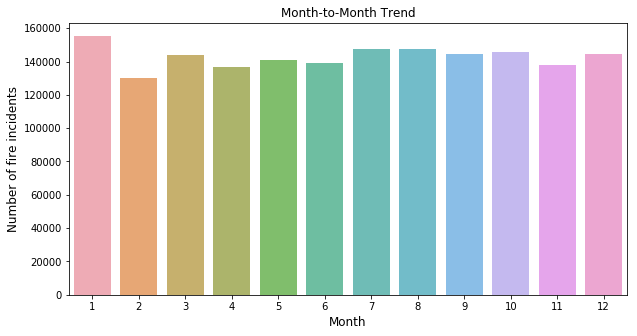

In [30]:
month_count  = fireDataFrame['month_response'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(month_count.index, month_count.values, alpha=0.8)
plt.title('Month-to-Month Trend')
plt.ylabel('Number of fire incidents', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

## Question 3: Where does fires tend to occur? We can answer this from visualization of incidents on the map of San Diego city.
### => According to pivot table, there are a lot of fires in the area with zipcode 92101 which is downtown.

In [31]:
firePivotTable = pd.pivot_table(fireDataFrame, values='incident_number', index=['address_zip'], columns=[], aggfunc=numpy.ma.count, fill_value=0)
firePivotTable

,incident_number
address_zip,
91911,178
91914,1
91932,224
91942,342
91945,128
91950,277
92014,7202
92025,515
92027,1256


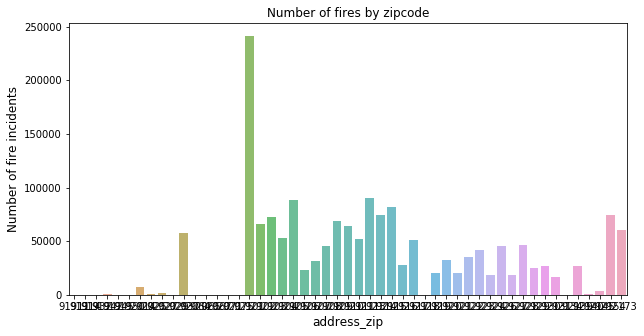

In [32]:
zip_count  = fireDataFrame['address_zip'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(zip_count.index, zip_count.values, alpha=0.8)
plt.title('Number of fires by zipcode')
plt.ylabel('Number of fire incidents', fontsize=12)
plt.xlabel('address_zip', fontsize=12)
plt.show()

## Question 4:	Is there a certain correlation between time and location? For each small district, we can check if more fires break out in a particular month or season.

## Mark the largest month response of each zip code

In [33]:
firePivotTable = pd.pivot_table(fireDataFrame, values='incident_number', index=['month_response'], columns=['address_zip'], aggfunc=numpy.ma.count, fill_value=0)
firePivotTable

address_zip,91911,91914,91932,91942,91945,91950,92014,92025,92027,92029,...,92128,92129,92130,92131,92134,92139,92140,92145,92154,92173
month_response,,,,,,,,,,,,,,,,,,,,,
1,18,0,24,27,13,23,619,38,92,3,...,4274,2383,2463,1528,4,2524,93,319,6692,5430
2,14,0,19,22,5,20,537,34,81,1,...,3647,1924,2102,1278,3,2073,68,268,5725,4489
3,11,1,18,28,8,24,607,36,122,2,...,3945,2061,2263,1349,7,2346,84,335,6153,5023
4,11,0,15,38,12,22,631,48,117,3,...,3714,1972,2119,1294,5,2171,86,271,6013,4759
5,15,0,16,23,8,27,564,37,99,2,...,3786,2086,2186,1393,2,2160,74,315,6307,5032
6,8,0,24,33,16,23,622,34,109,3,...,3648,2053,2191,1352,5,2183,95,312,5998,4860
7,13,0,16,29,8,18,694,49,139,3,...,3699,2059,2297,1362,2,2206,92,304,6097,5206
8,12,0,20,32,7,28,628,51,137,4,...,3751,2182,2263,1407,1,2225,88,295,6380,5397
9,17,0,18,33,15,21,541,38,90,0,...,3839,2033,2267,1329,7,2120,89,276,6010,5146


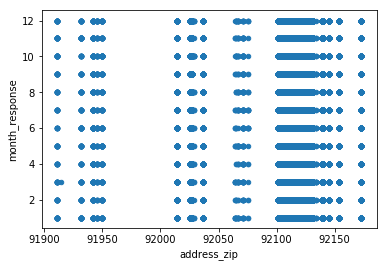

In [34]:
fireDataFrame.plot(x='address_zip', y='month_response', kind='scatter')

## Qeustion 5:	How can the city improve response time? Does the city need more fire stations/health care? We can try to find the distance between events and fire stations/health care:
### a.	Find the shortest distance between a zip code and the nearest fire station.
### b.	Calculate average of shortest distances for all zip codes.

In [6]:
# To create interactive pivot table, you need to install pivottablejs
from pivottablejs import pivot_ui

In [9]:
# The below code makes a stand-alone pivot talbe.
# If your jupyter notebook configuratino is well adjusted, you can also make a pivot table acting in jupyter notebook cell.
pivot_ui(fireDataFrame, outfile_path = 'C:/1-HYK/UCSD-Course/05-WINTER20-ECE143/GroupProject/data/data/FireIncidentPivot.html')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/1-HYK/UCSD-Course/05-WINTER20-ECE143/GroupProject/data/data/FireIncidentPivot.html'

In [13]:
import os
os.getcwd()

'C:\\1-HYK\\UCSD-Course\\05-WINTER20-ECE143\\GroupProject\\data\\data'